# Regression Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. 단일회귀분석

> ## 1) Load Data

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Galton.txt'
DF = pd.read_table(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [ ]:
DF.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


> ## 2) 남자 데이터만 분리

In [ ]:
DFS = DF.loc[DF.Gender == 'M', :]

DFS.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


> ## 3) pearson 상관계수

In [ ]:
from scipy import stats

stats.pearsonr(DFS.Father, DFS.Height)[0]

0.3913173581417901

> ## 4) 회귀선 시각화

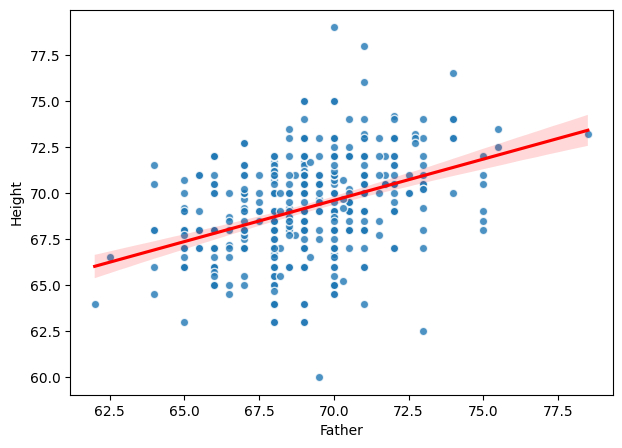

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7, 5))
sns.regplot(x = DFS.Father,
            y = DFS.Height,
            line_kws = {'color':'red'},
            scatter_kws = {'edgecolor' : 'white'})
plt.show()

> ## 5) Modeling

In [ ]:
import statsmodels.formula.api as smf

Model_lm = smf.ols(formula = 'Height ~ Father',
                   data = DFS).fit()

> ## 6) Model Summary

* 잔차(residual) 검증
 - Prob(Omnibus) & Prob(JB) : 0.05보다 크면 정규분포
 - 왜도(Skew) : 정규분포는 '0', '0'보다 크면 오른쪽 자락이 길어짐
 - 첨도(Kurtosis) : 정규분포는 '3'
 - Durbin-Watson : 잔차의 자기상관 체크 지표 '2' 전후

In [ ]:
Model_lm.summary(alpha = 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     83.72
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           1.82e-18
Time:                        02:43:10   Log-Likelihood:                -1070.6
No. Observations:                 465   AIC:                             2145.
Df Residuals:                     463   BIC:                             2153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.2589      3.387     11.297      0.000      31.604      44.914
Father         0.4477      0.049      9.150      0.000       0.352       0.544
==============================================================================
Omnibus:                        8.699   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               13.007
Skew:                          -0.112   Prob(JB):                      0.00150
Kurtosis:                       3.788   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# II. 모델의 선형성

> ## 1) 예측값(fitted) 계산

In [ ]:
fitted = Model_lm.predict(DFS.Father)

> ## 2) 잔차(residual) 계산

* 실제값과 예측값의 차이

In [ ]:
residual = DFS.Height - fitted

> ## 3) 예측값과 잔차 비교

* 모든 예측값에서 잔차가 비슷하게 있어야 함
* 잔차의 추세 : 빨간실선
* 빨간실선이 회색점선을 크게 벗어난다면 예측값에 따라 잔차가 크게 달라지는 것을 의미

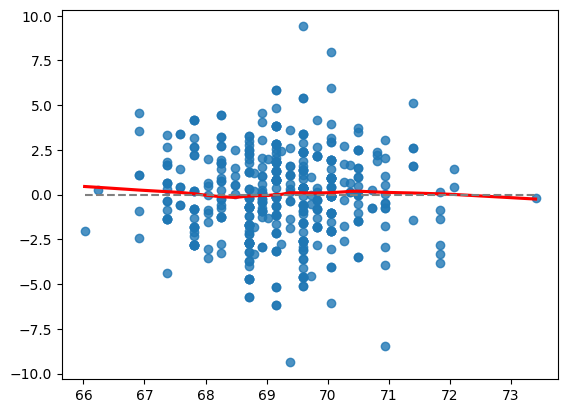

In [ ]:
sns.regplot(x = fitted,
            y = residual,
            lowess = True,
            line_kws = {'color':'red'})
plt.plot([fitted.min(), fitted.max()],
         [0, 0], '--', color = 'gray')
plt.show()

# III. 잔차분석

> ## 1) 잔차의 정규성

* 잔차가 정규분포를 따른다는 가정 검증

In [ ]:
import scipy.stats

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

* Q-Q 플롯
 * 잔차가 정규분포를 띄면 Q-Q 플롯에서 점들이 점선을 따라 배치

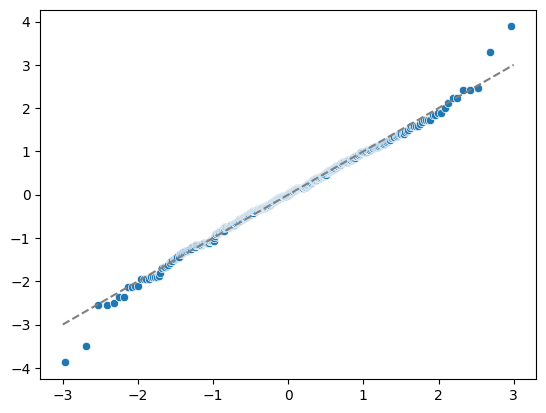

In [ ]:
sns.scatterplot(x = x,
                y = y)
plt.plot([-3, 3], [-3, 3], '--', color = 'grey')
plt.show()

* shapiro Test
 * p값이 0.05보다 작아 잔차의 정규성을 따른다는 귀무가설을 기각
 * 유의수준 5%에서 잔차의 정규성 위반

In [ ]:
scipy.stats.shapiro(residual)[1]

0.049906473606824875

* Residual Visualization

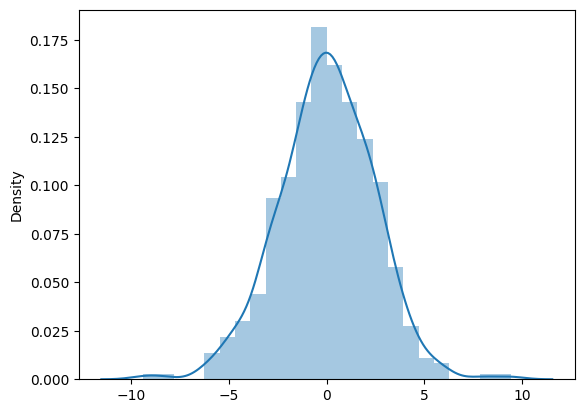

In [ ]:
sns.distplot(residual)
plt.show()

> ## 2) 잔차의 등분산성

* 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
 * 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 시각화
 * 빨간실선이 수평선을 그리는 것이 이상적

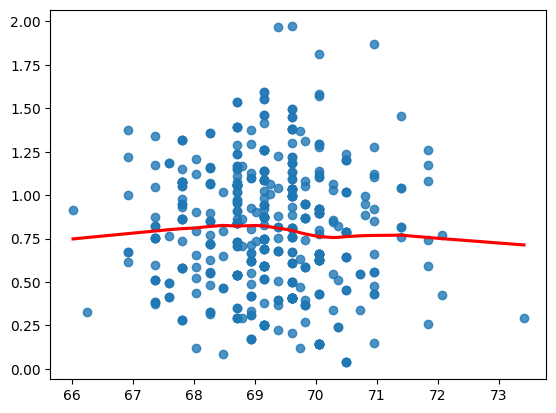

In [ ]:
import numpy as np

sns.regplot(x = fitted,
            y = np.sqrt(np.abs(sr)),
            lowess = True,
            line_kws = {'color': 'red'})
plt.show()

> ## 3) 잔차의 독립성

* 회귀분석에서 잔차는 정규성, 등분산성 그리고 독립성을 가지는 것으로 가정
* 자료 수집 시 Random Sampling을 하였다면, 잔차의 독립성은 만족하는 것으로 봄

> ## 4) 극단값

* Cook's distance
 * 극단값을 나타내는 지표

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

cd, _ = OLSInfluence(Model_lm).cooks_distance

* 59번자료가 예측에서 많이 벗어남을 확인

In [ ]:
cd.sort_values(ascending = False).head()

59     0.050149
22     0.026499
868    0.023930
17     0.020738
125    0.019052
dtype: float64

# IV. 다중회귀분석

> ## 1) Load Data

In [ ]:
import seaborn as sns

In [ ]:
DF2 = sns.load_dataset('iris')

DF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
DF2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> ## 2) pearson 상관계수

In [ ]:
DF2.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


> ## 3) Visualization

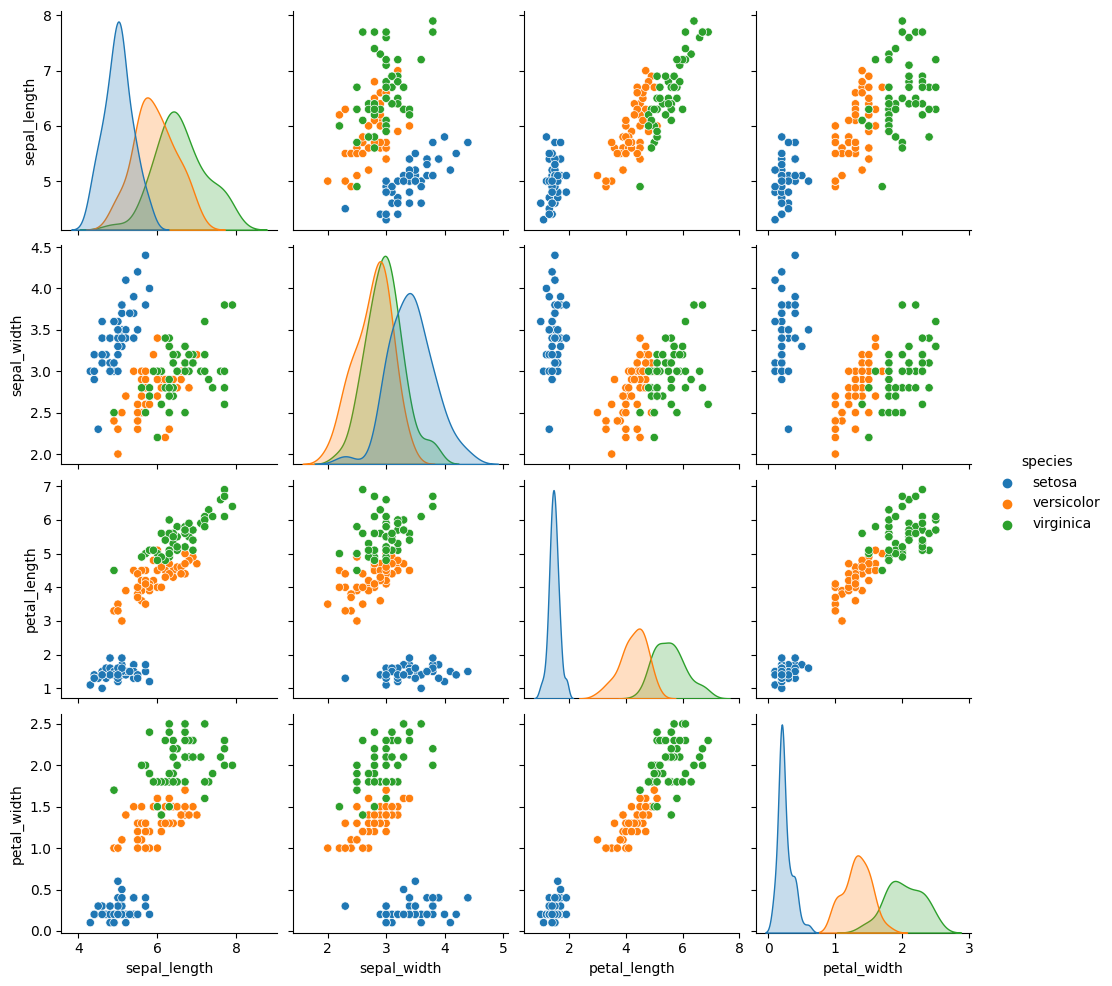

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(hue = 'species', data = DF2)
plt.show()

> ## 4) Modeling

In [ ]:
import statsmodels.formula.api as smf

Model = smf.ols(formula = 'sepal_length ~ sepal_width + petal_length + petal_width',
                data = DF2)

In [ ]:
Model_mr = Model.fit()

> ## 5) Model Summary

In [ ]:
Model_mr.summary(alpha = 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     295.5
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           8.59e-62
Time:                        02:46:47   Log-Likelihood:                -37.321
No. Observations:                 150   AIC:                             82.64
Df Residuals:                     146   BIC:                             94.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8560      0.251      7.401      0.000       1.360       2.352
sepal_width      0.6508      0.067      9.765      0.000       0.519       0.783
petal_length     0.7091      0.057     12.502      0.000       0.597       0.821
petal_width     -0.5565      0.128     -4.363      0.000      -0.809      -0.304
==============================================================================
Omnibus:                        0.345   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.504
Skew:                           0.007   Prob(JB):                        0.777
Kurtosis:                       2.716   Cond. No.                         54.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# V. 다중공선성(Multicollinearity)

* 공선성(Collinearity) : 독립변수가 다른 독립변수로 잘 예측되는 경우
 * 또는 서로 상관이 높은 경우
* 다중공선성(Multicollinearity) : 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

> ## 1) 독립변수 확인

In [ ]:
Model.exog_names

['Intercept', 'sepal_width', 'petal_length', 'petal_width']

> ## 2) 다중공선성 진단

* 분산팽창계수(VIF:Variance Inflation Factor)
 * 엄밀한 기준은 없으나 보통 10보다 크면 다중공선성이 있다고 판단
 * 5를 기준으로 하기도 함

* 'sepal_width'의 VIF

In [ ]:
variance_inflation_factor(Model.exog, 1)

1.270814929344654

* 'petal_length'의 VIF

In [ ]:
variance_inflation_factor(Model.exog, 2)

15.097572322915717

* 'petal_width'의 VIF

In [ ]:
variance_inflation_factor(Model.exog, 3)

14.234334971742083

* pearson 상관계수

In [ ]:
DF2.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


> ## 3) 다중공선성 해결

* VIF가 큰 독립변수를 제거 후 모델링
 * 'petal_width' 제거

In [ ]:
Model_VIF = smf.ols(formula = 'sepal_length ~ sepal_width + petal_length',
                    data = DF2).fit()

* 다중공선성 처리 후

In [ ]:
Model_VIF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     386.4
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           2.93e-59
Time:                        02:46:47   Log-Likelihood:                -46.513
No. Observations:                 150   AIC:                             99.03
Df Residuals:                     147   BIC:                             108.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.2491      0.248      9.070      0.000       1.759       2.739
sepal_width      0.5955      0.069      8.590      0.000       0.459       0.733
petal_length     0.4719      0.017     27.569      0.000       0.438       0.506
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.319
Skew:                          -0.044   Prob(JB):                        0.853
Kurtosis:                       2.792   Cond. No.                         48.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#
#
#
# End Of Document
#
#
#